# 시계열 데이터? --> RNN, LSTM, GRU

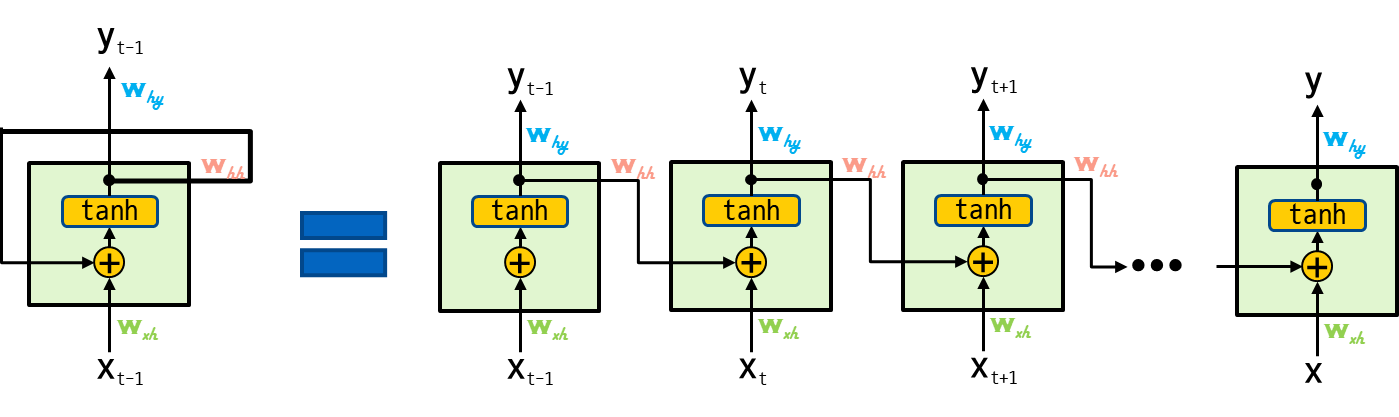

## 시간의 흐름에 따라 순서대로 나열된 데이터
### 1️⃣ 일상생활 속 시계열 데이터 예시
* 📊 일주일 동안의 기온 변화
* 💰 한 달 동안의 용돈 사용 내역
* 📏 1년 동안의 키 성장 기록

### 2️⃣ 문장의 시계열성
단어의 위치만 바꾸어도 전혀 다른 의미가 되는 예시:

| 문장 | 의미 |
|------|------|
| "나는 밥**만** 먹었다" | 다른 것은 안 먹고 밥만 먹음 |
| "나**만** 밥을 먹었다" | 다른 사람은 안 먹고 나만 먹음 |

### 3️⃣ 단어도 시계열성
같은 알파벳으로 구성되지만, 순서에 따라 다른 의미를 가지는 단어들:

| 단어 | 의미 |
|------|------|
| NOW | 지금, 현재 |
| WON | 이기다 (win의 과거형) |
| OWN | 소유하다, 자신의 것 |

### 🔑 핵심 포인트
모든 경우에서 **순서**가 바뀌면 의미가 달라지거나 의미가 없어질 수 있음

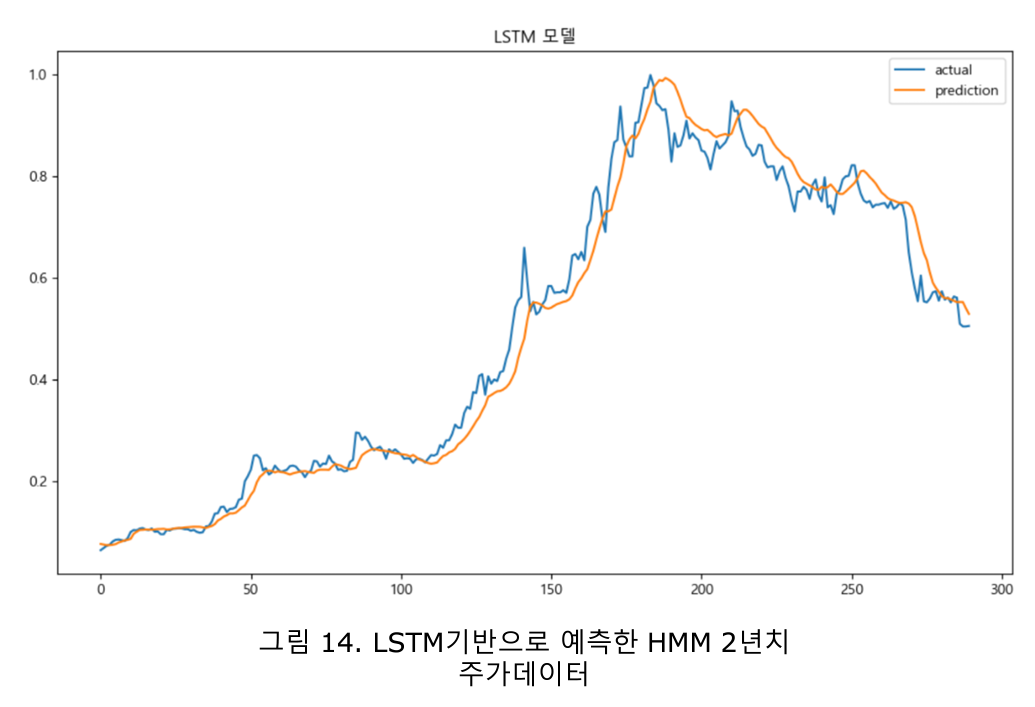

## 시계열 데이터의 특징
## 1. 시간 의존성 (Time Dependency)
> "오늘의 날씨는 어제의 날씨와 관련이 있다"
- 시간순서대로 수집된 데이터는 서로 연관되어 있습니다.(현재 시점의 데이터는 과거 데이터의 영향을 받습니다.)
- 예: 주식 가격, 기온 변화, 판매량 등

## 2. 주기성 (Seasonality)
> "일년에 한번씩 크리스마스 시즌에는 선물 판매량이 늘어난다"
- 정해진 주기로 반복되는 패턴을 보입니다(일별, 주별, 월별, 연도별 등 다양한 주기가 있습니다)
- 예:
 - 커피숍의 하루 매출 (아침/점심/저녁 피크)
 - 백화점의 주간 매출 (주말 증가)
 - 아이스크림 판매량 (여름 증가)

## 3. 추세 (Trend)
> "인구수는 계속해서 늘어나는 추세를 보인다"
- 장기적으로 보았을 때 전반적인 증가/감소 경향을 보입니다.(데이터가 특정 방향으로 움직이는 경향을 말합니다)
- 예:
 - 전기차 판매량의 증가 추세
 - 스마트폰 사용자 수의 증가 추세
 - 특정 상품의 가격 하락 추세

## 4. 노이즈 (Noise)
> "매출은 전반적으로 증가하지만, 어떤 날은 갑자기 확 줄어들기도 한다"
- 예측할 수 없는 불규칙한 변동이 존재합니다.(데이터에 포함된 무작위적인 변화를 의미합니다.)
- 예:
 - 갑작스러운 날씨 변화로 인한 매출 감소
 - 특별한 이유 없는 주가 변동
 - 센서 측정값의 오차

## 5. 정상성 (Stationarity)
> "여름철 아이스크림 평균 판매량은 매년 비슷하다"
- 시간이 지나도 평균과 분산이 크게 변하지 않습니다.(안정적인 패턴을 보이는 데이터의 특성입니다)
- 예:
 - 연간 계절별 기온 변화
 - 하루 중 시간대별 교통량
 - 주간 요일별 매출 패턴

## 6. 순차적 특성 (Sequential Nature)
> "시험 성적의 변화를 볼 때는 반드시 시간 순서대로 봐야 한다"
- 데이터의 순서가 매우 중요합니다.(순서를 섞으면 의미가 달라집니다)
- 예:
 - 학습 과정에서의 실력 변화
 - 질병의 증상 진행 과정
 - 제품의 품질 변화 추이

이러한 특징들을 이해하면 시계열 데이터를 더 잘 분석하고 예측할 수 있습니다.

# RNN(순환신경망)으로 주기성과 패턴이 있는 값 예측(회귀)

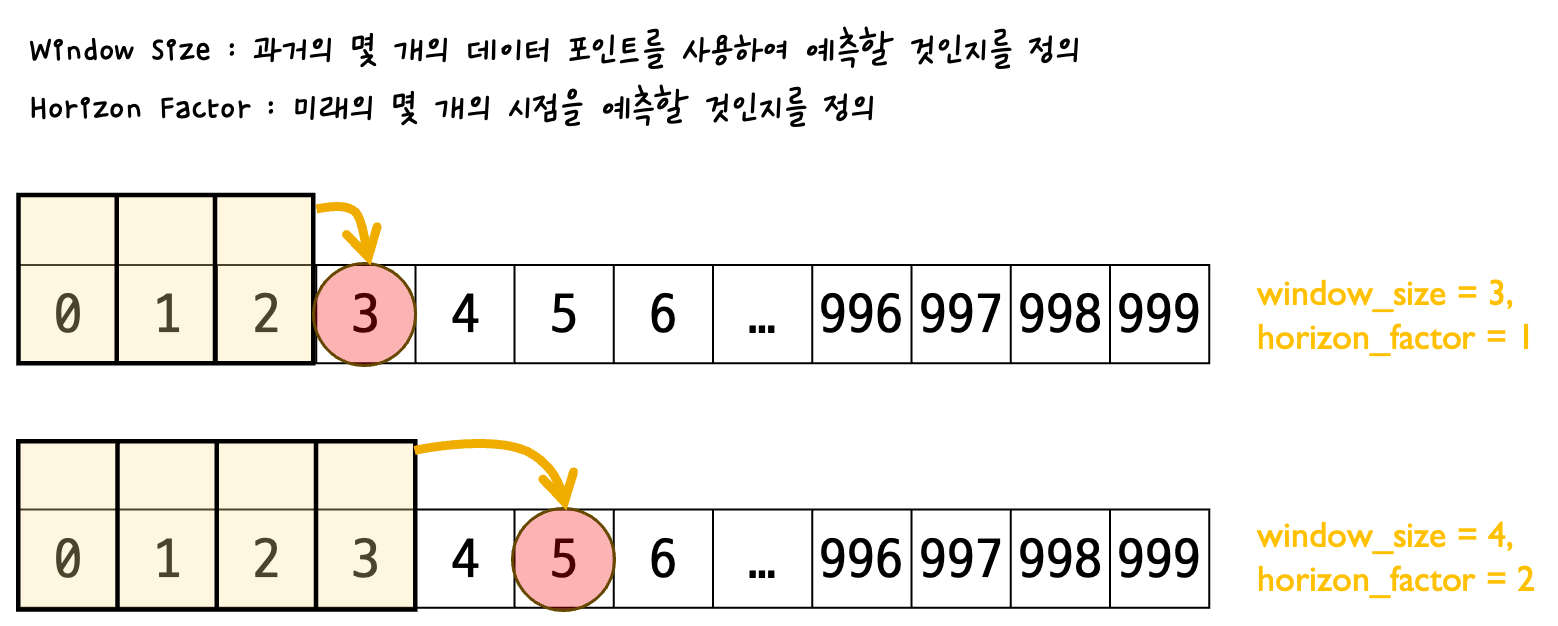

## 데이터 생성

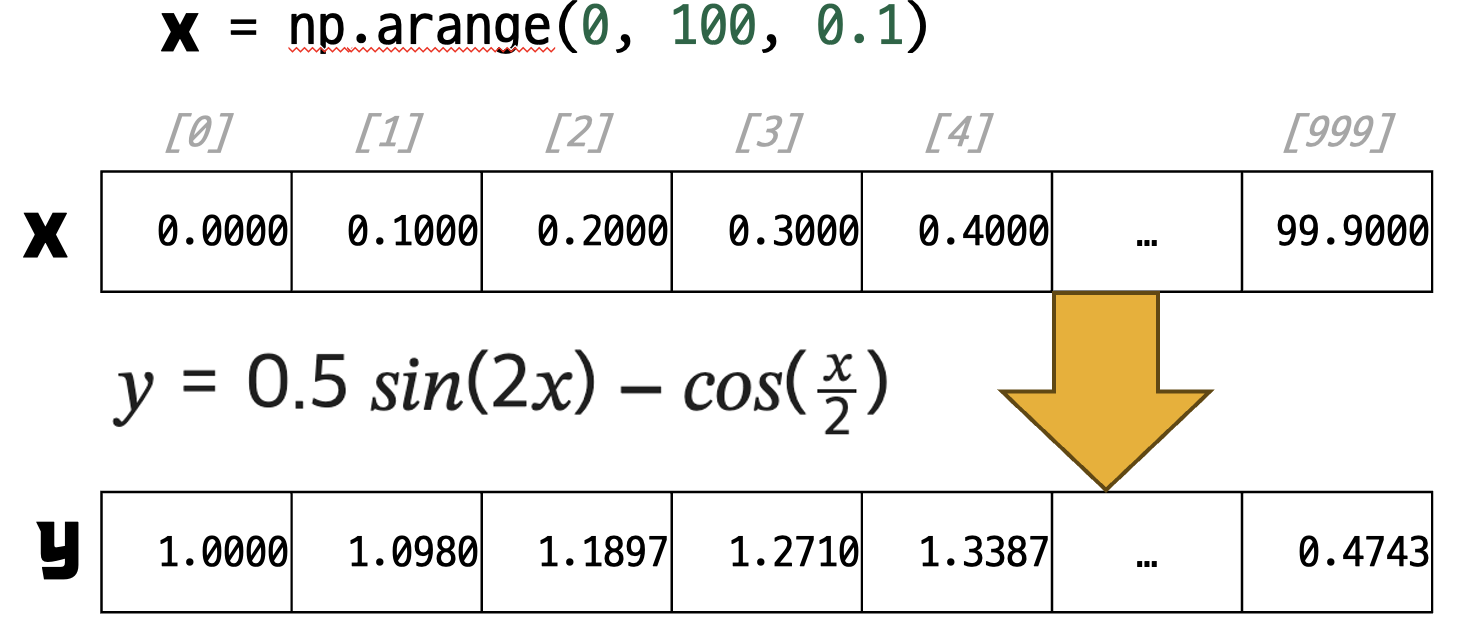

In [ ]:
import numpy as np

x = np.arange(0, 100, 0.1)

y = 0.5 * np.sin(2 * x) + np.cos(x / 2)

In [ ]:
print(x.shape)
print(x[:5])
print(x[999])

(1000,)
[0.  0.1 0.2 0.3 0.4]
99.9


In [ ]:
print(y.shape)
print(y[:5])
print(y[999])

(1000,)
[1.         1.09808493 1.18971334 1.27109231 1.33874462]
0.47430742356127453


## 생성된 데이터 시각화(주기성, 패턴 등을 가진 데이터 생성)

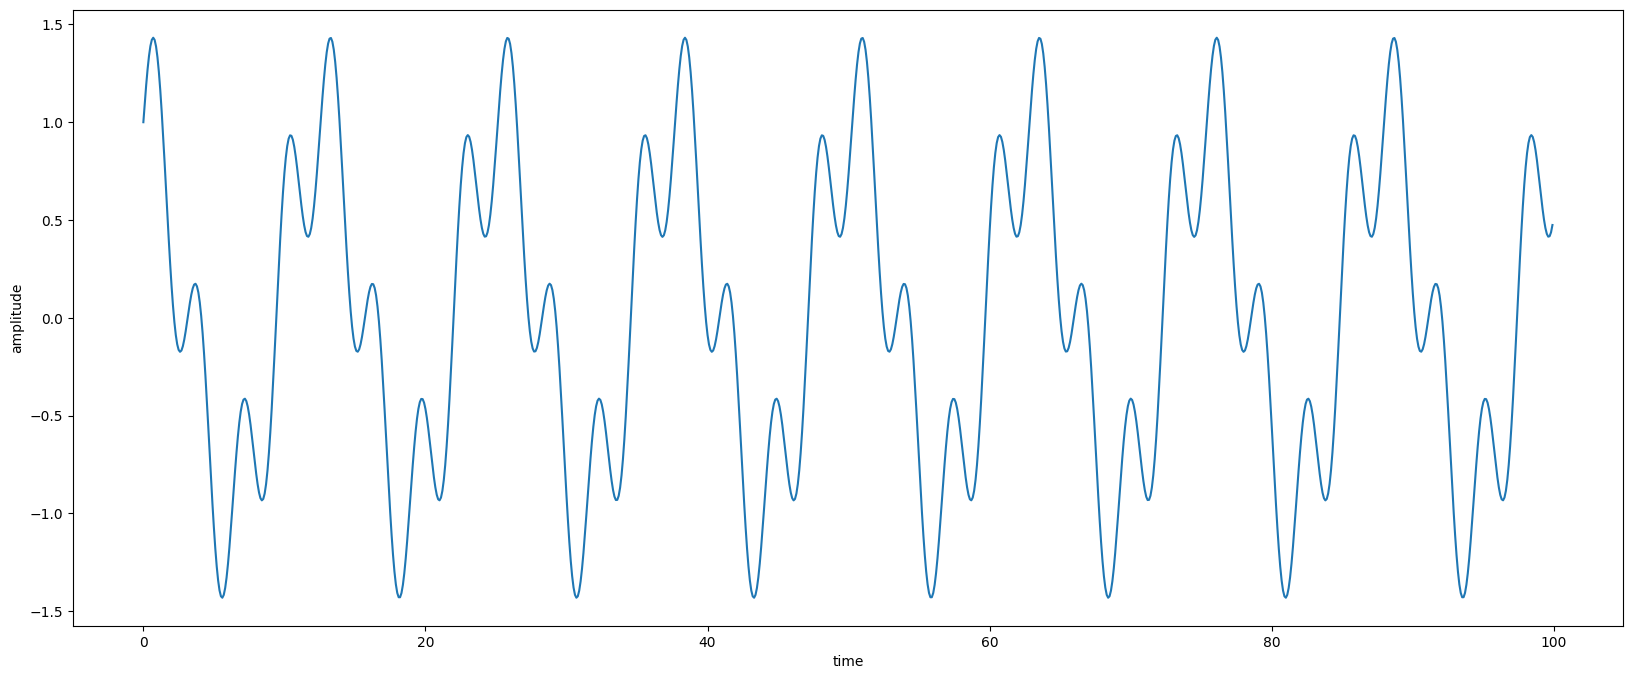

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,8))

plt.xlabel('time')
plt.ylabel('amplitude')
plt.plot(x, y)

plt.show()

## Keras의 RNN의 학습 데이터는 3차원 데이터 셋을 요구한다.

In [ ]:
print(y.shape)

seq = y.reshape(1000, 1)

print(seq.shape)

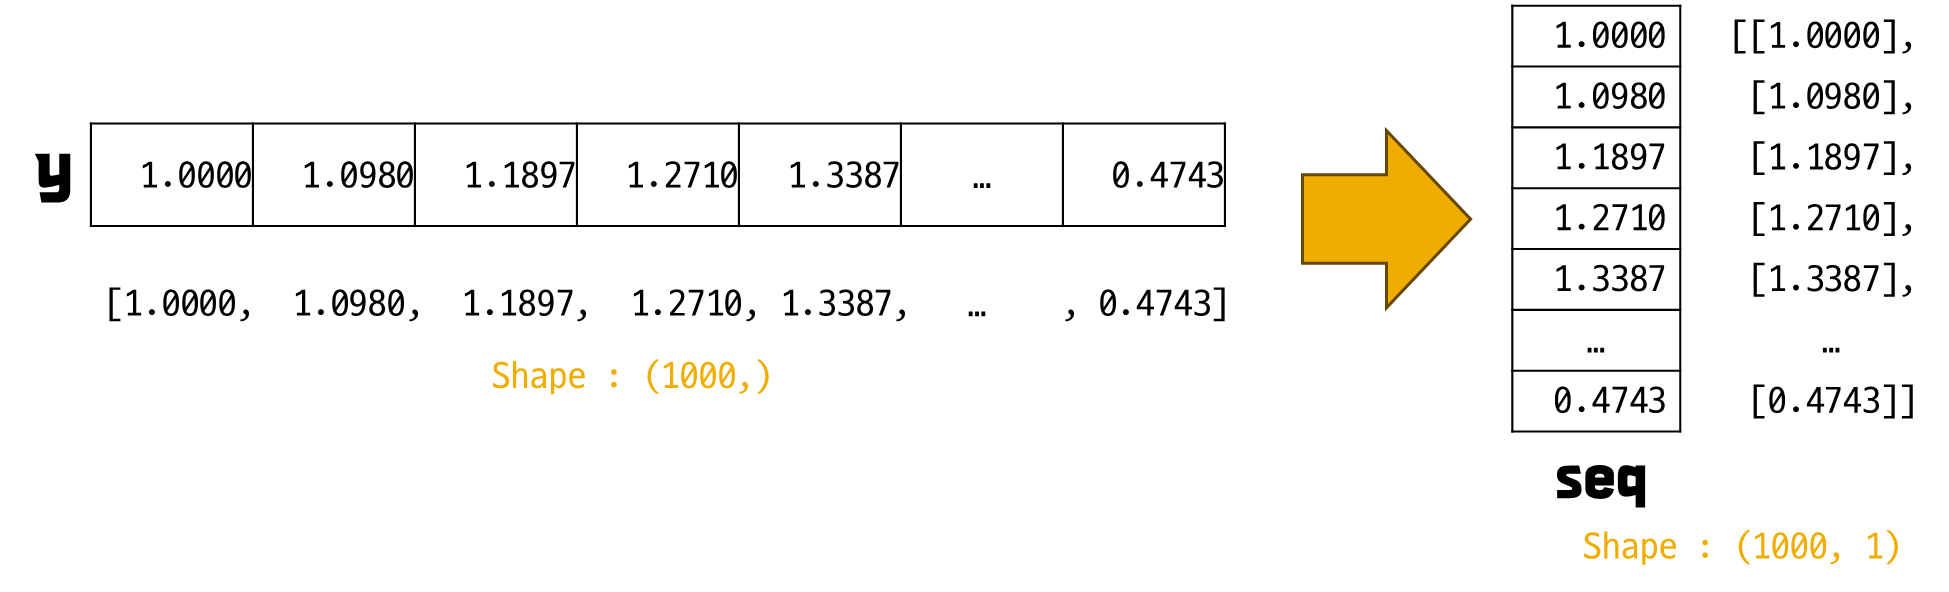

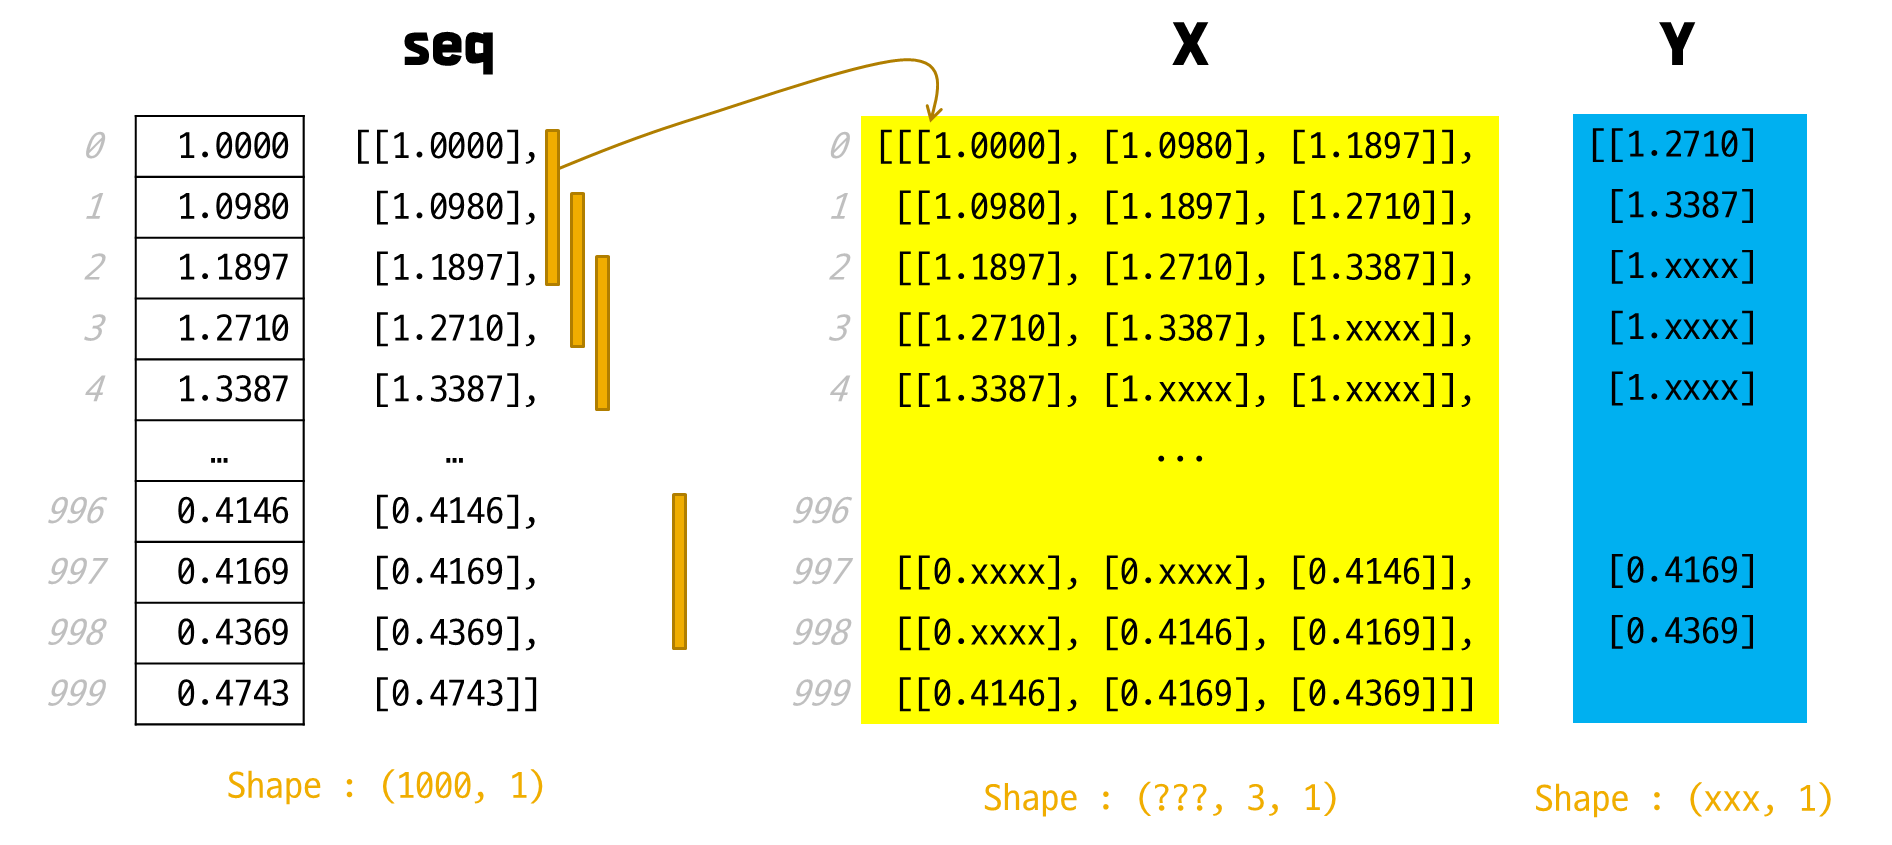

In [ ]:
w = 3      # window size
h = 1       # horizon factor

X = []
Y = []

for i in range(len(seq)-(w + h) + 1):
    x = seq[i : i + w]
    y = seq[i + w + h - 1]

    X.append(x)
    Y.append(y)

X = np.array(X)
Y = np.array(Y)

print(X.shape, Y.shape)

## 데이터(X, Y)를 훈련용(80%) : 평가용(20%)로 분리

In [ ]:
split_ratio = 0.8

split = int(split_ratio * len(X))

train_X = X[0:split]
train_Y = Y[0:split]

test_X = X[split:]
test_Y = Y[split:]

### > 왜 무작위로 섞지 않았을까???

## 모델 개발(훈련 데이터로 모델 개발)

In [ ]:
import keras

model = keras.Sequential()

model.add(keras.layers.SimpleRNN(units=128, activation='tanh',input_shape=(3, 1)))

model.add(keras.layers.Dense(1))

In [ ]:
model.compile(loss='mse', optimizer='adam', metrics=['mae'])
hist = model.fit(train_X, train_Y, epochs=100, validation_data=(test_X, test_Y))

## 평가 데이터 예측해 보기

In [ ]:
pred = model.predict(test_X)

print(pred.shape)

In [ ]:
rand_idx = np.random.randint(0, len(y_test), size=5)

print('랜덤 인덱스 = ',rand_idx, '\n')

print('예측값 = ', pred.flatten()[rand_idx])
print('실제값 = ', test_X.flatten()[rand_idx])

print('오차값 = ', test_Y.flatten()[rand_idx] - pred.flatten()[rand_idx])

## 평가 데이터 시각화

In [ ]:
plt.plot(pred, label='prediction', linewidth="15")
plt.plot(test_Y, label='label', linewidth="3")
plt.grid()

plt.show()

## 코드 종합(window_size=3)

In [ ]:
import numpy as np
import keras

# 데이터 생성
x = np.arange(0, 100, 0.1)
y = 0.5 * np.sin(2 * x) + np.cos(x / 2)

# 2차원 배열로 : (1000,) --> (1000, 1)
seq = y.reshape(-1, 1)

w = 3      # window size
h = 1       # horizon factor


# RNN 학습을 위한 데이터 셋으로 변경
X, Y = [], []
for i in range(len(seq)-(w + h) + 1):
    x = seq[i : i + w]
    y = seq[i + w + h - 1]

    X.append(x)
    Y.append(y)

X = np.array(X) # 파이썬 리스트를 넘파이 배열로 변환
Y = np.array(Y)


# 훈련 데이터와 평가 데이터로 분리
split_ratio = 0.8

split = int(split_ratio * len(X))

train_X = X[0:split]
train_Y = Y[0:split]

test_X = X[split:]
test_Y = Y[split:]


# 모델 생성
model = keras.Sequential()
model.add(keras.layers.SimpleRNN(units=128, activation='tanh',input_shape=(3,1)))
model.add(keras.layers.Dense(1))

model.compile(loss='mse', optimizer='adam', metrics=['mae'])

# 모델 훈련
hist = model.fit(train_X, train_Y, epochs=100, validation_data=(test_X, test_Y))

In [ ]:
pred = model.predict(test_X)

print(pred.shape)

In [ ]:
plt.plot(pred, label='prediction', linewidth="15")
plt.plot(test_Y, label='label', linewidth="3")
plt.grid()

plt.show()

## 코드 종합(window_size=20)

In [ ]:
import numpy as np
import keras

# 데이터 생성
x = np.arange(0, 100, 0.1)
y = 0.5 * np.sin(2 * x) + np.cos(x / 2)

# 2차원 배열로 : (1000,) --> (1000, 1)
seq = y.reshape(-1, 1)

w = 20      # window size
h = 1       # horizon factor


# RNN 학습을 위한 데이터 셋으로 변경
X, Y = [], []
for i in range(len(seq)-(w + h) + 1):
    x = seq[i : i + w]
    y = seq[i + w + h - 1]

    X.append(x)
    Y.append(y)

X = np.array(X) # 파이썬 리스트를 넘파이 배열로 변환
Y = np.array(Y)


# 훈련 데이터와 평가 데이터로 분리
split_ratio = 0.8

split = int(split_ratio * len(X))

train_X = X[0:split]
train_Y = Y[0:split]

test_X = X[split:]
test_Y = Y[split:]


# 모델 생성
model = keras.Sequential()
model.add(keras.layers.SimpleRNN(units=128, activation='tanh',input_shape=(20, 1)))
model.add(keras.layers.Dense(1))

model.compile(loss='mse', optimizer='adam', metrics=['mae'])

# 모델 훈련
hist = model.fit(train_X, train_Y, epochs=100, validation_data=(test_X, test_Y))

In [ ]:
pred = model.predict(test_X)

print(pred.shape)

In [ ]:
plt.plot(pred, label='prediction', linewidth="15")
plt.plot(test_Y, label='label', linewidth="3")
plt.grid()

plt.show()

# 일반 데이터 vs 시계열 데이터

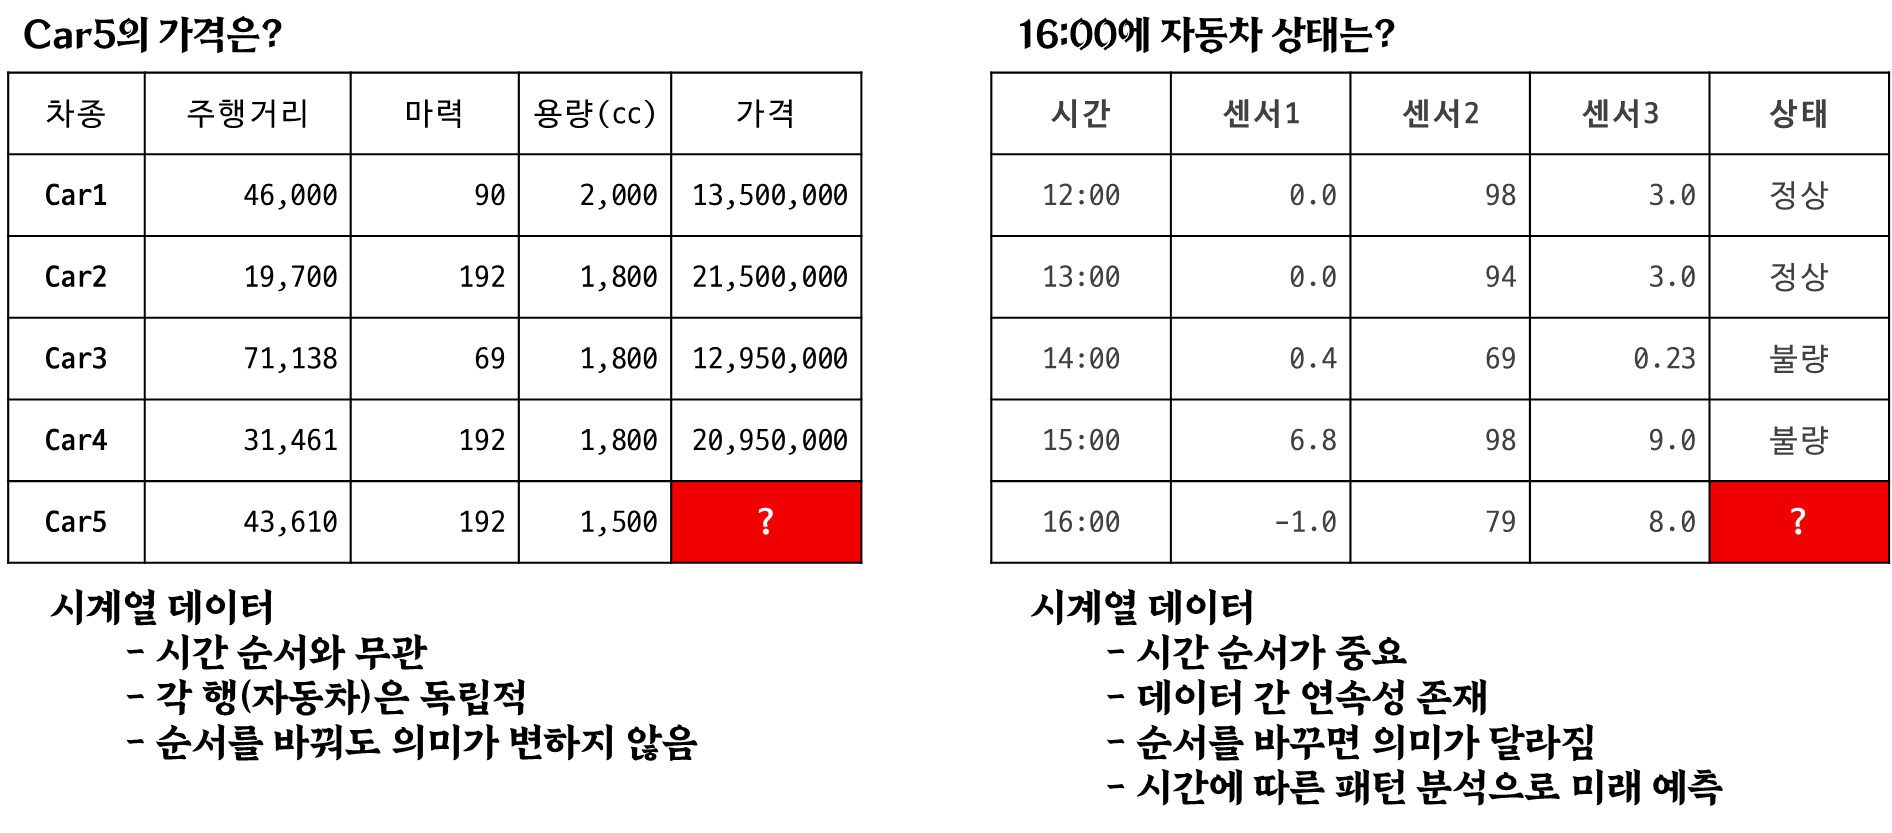

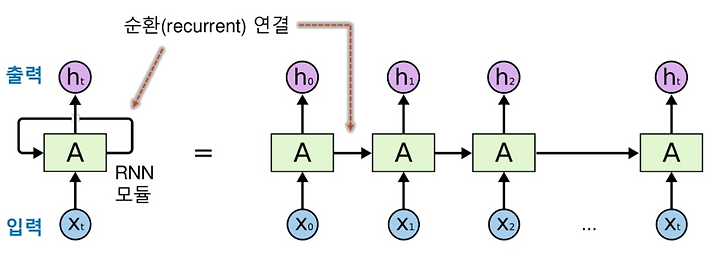

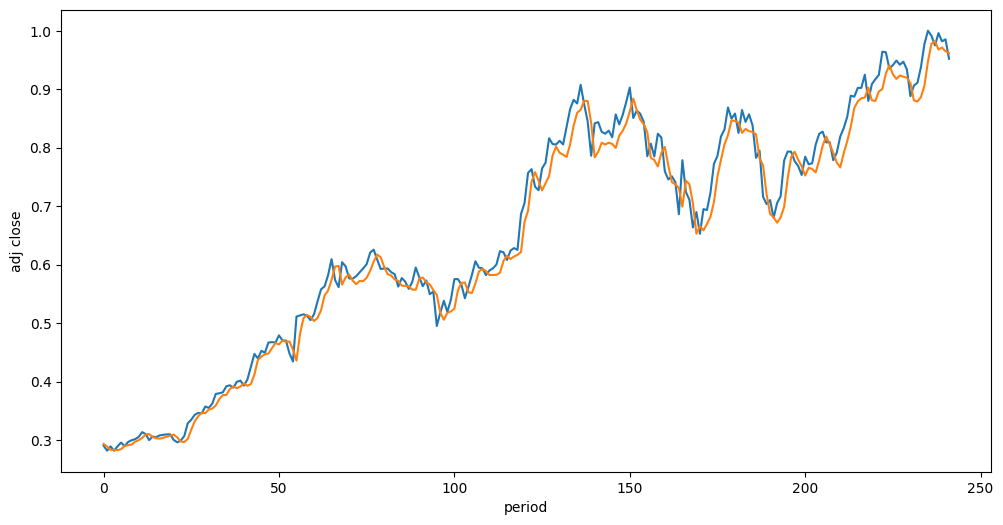

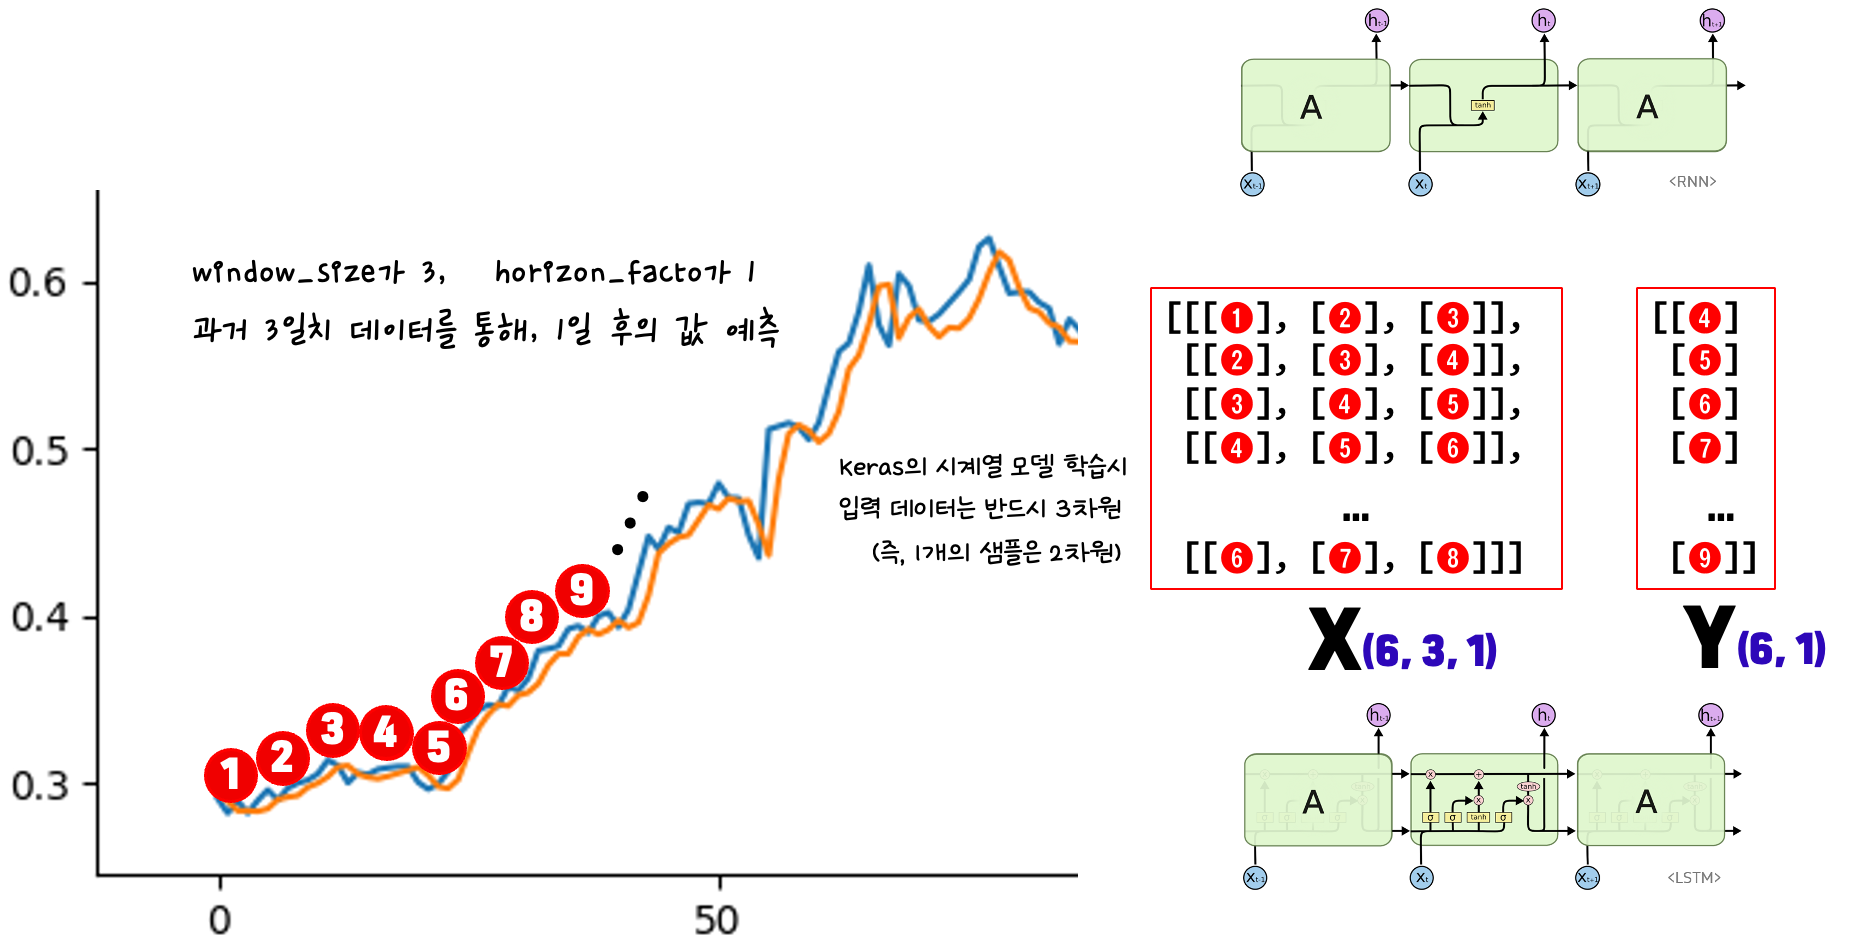

링크 :
* nvidia : https://finance.yahoo.com/quote/NVDA/
* Tesla : https://finance.yahoo.com/quote/TSLA/
* 삼성전자 : https://finance.yahoo.com/quote/005930.KS/
* 현대자동차 : https://finance.yahoo.com/quote/042670.KS/

# NVIDIA 주가 예측 모델

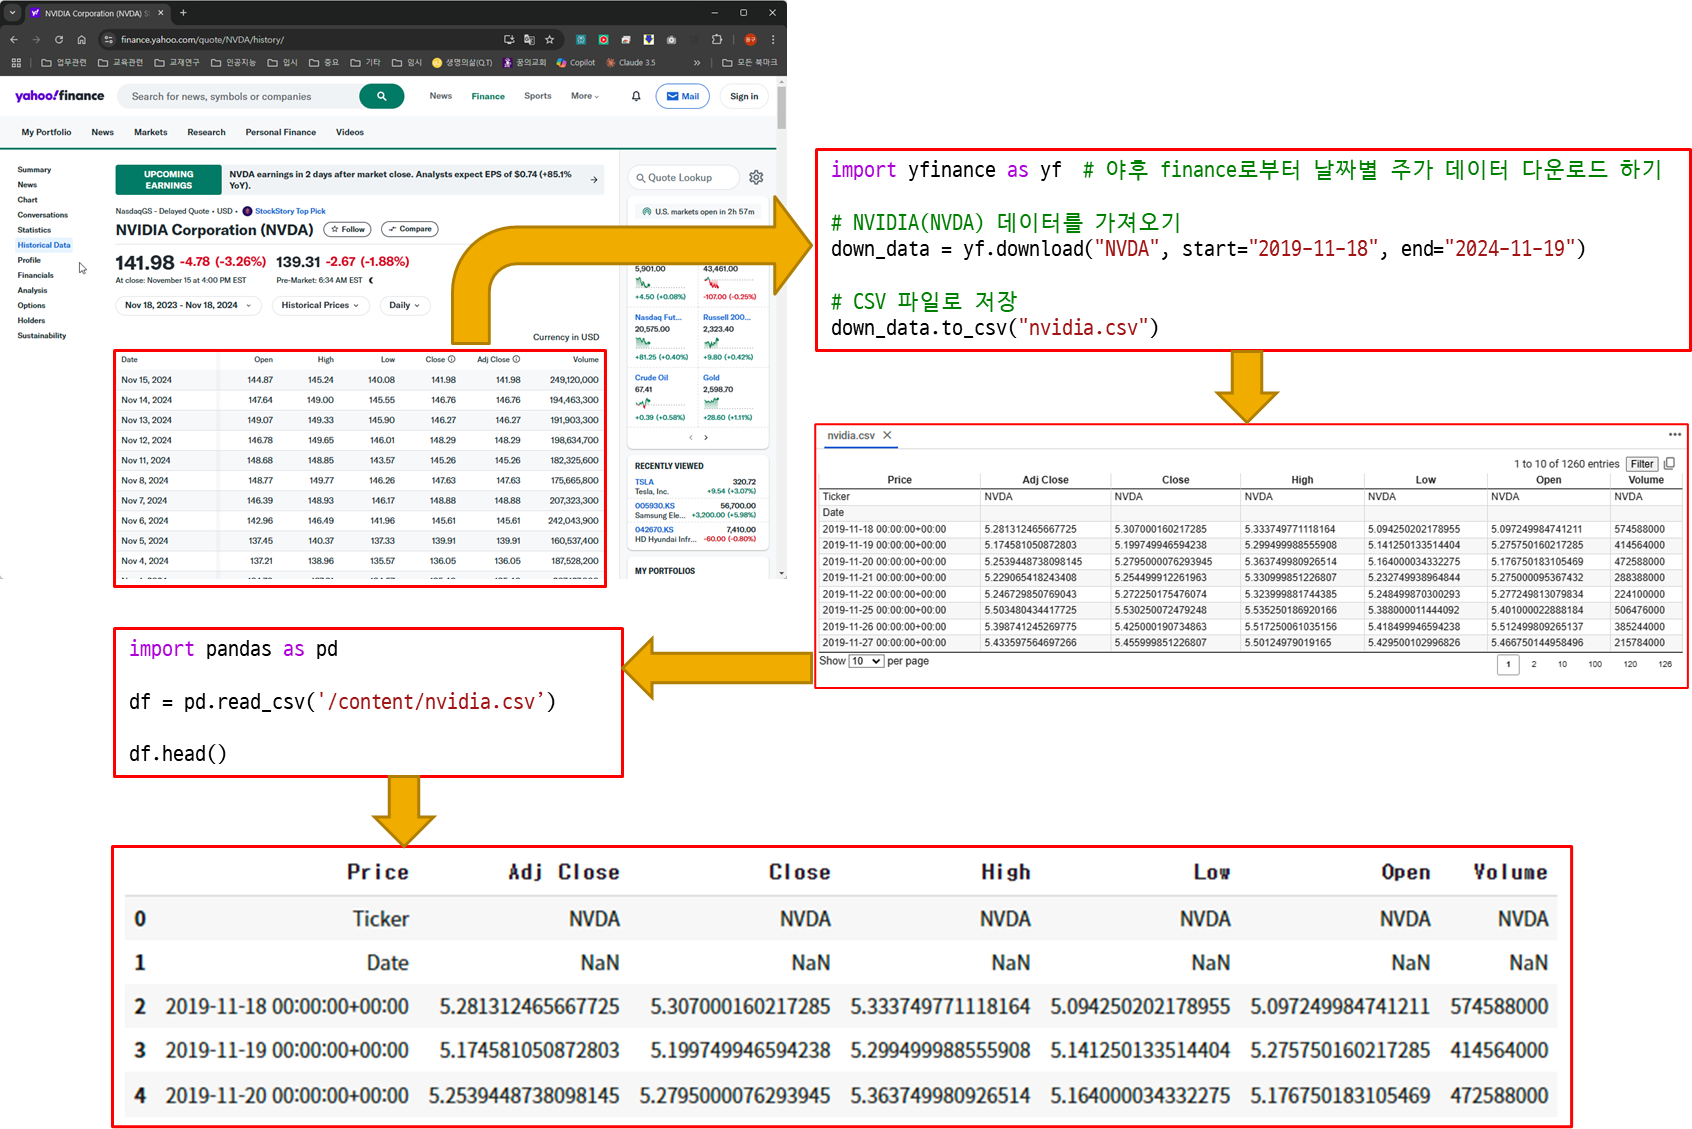

## 1. 데이터 준비하기 : 야후 Finance에서 nvidia 날짜별 주식 정보 다운로드 받고, 불러오기

In [ ]:
# yahoo finance 주가 데이터 받는 api 라이브러리

!pip install yfinance

In [ ]:
# 야후 finance로부터 날짜별 주가 데이터 다운로드 하기
import yfinance as yf

# NVIDIA(NVDA) 데이터를 가져오기
down_data = yf.download("NVDA", start="2019-11-18", end="2024-11-19")  # 날짜 범위 설정

# CSV 파일로 저장
down_data.to_csv("nvidia.csv")

In [ ]:
# nvidia.csv 파일 불러와서 판다스 dataframe 생성
import pandas as pd

df = pd.read_csv('/content/nvidia.csv')

df.head()

* 시가 (Open) : 장 초반 투자자들의 심리 반영, 갭 상승/하락 확인
* 최고가/최저가 (High/Low) : 일중 변동성 파악, 지지/저항 레벨 형성
* 종가 (Close) : 가장 중요한 가격 지표, 일일 차트 분석의 기준
* 조정 종가 (Adj Close) : 장기 차트 분석에 사용, 실제 수익률 계산에 적합
* 거래량 (Volume) : 가격 변동의 신뢰도 확인, 시장 참여자들의 관심도 측정

## 2. 데이터 살펴보고 전처리 하기

In [ ]:
# 0행, 1행 삭제

df = df.drop([0, 1])
df

In [ ]:
# 컬럼 이름 변경

df = df.rename(columns={'Price': 'date'})
df

In [ ]:
# 해당 데이터 프레임에 대한 정보를 보자.
# ex) 샘플의 개수, 숫자인가?, null값은 없는가? 등등

df.info()

In [ ]:
# 모든 데이터를 숫자로
# 모든 자료형이 문자 ==> 따라서 "문자데이터(object) 숫자(numeric)"로

df['Adj Close'] = pd.to_numeric(df['Adj Close'], errors='coerce')
df['Close']     = pd.to_numeric(df['Close'], errors='coerce')
df['High']      = pd.to_numeric(df['High'], errors='coerce')
df['Low']       = pd.to_numeric(df['Low'], errors='coerce')
df['Open']      = pd.to_numeric(df['Open'], errors='coerce')
df['Volume']    = pd.to_numeric(df['Volume'], errors='coerce')

In [ ]:
df.info()

## 3. 데이터 정규화 하기

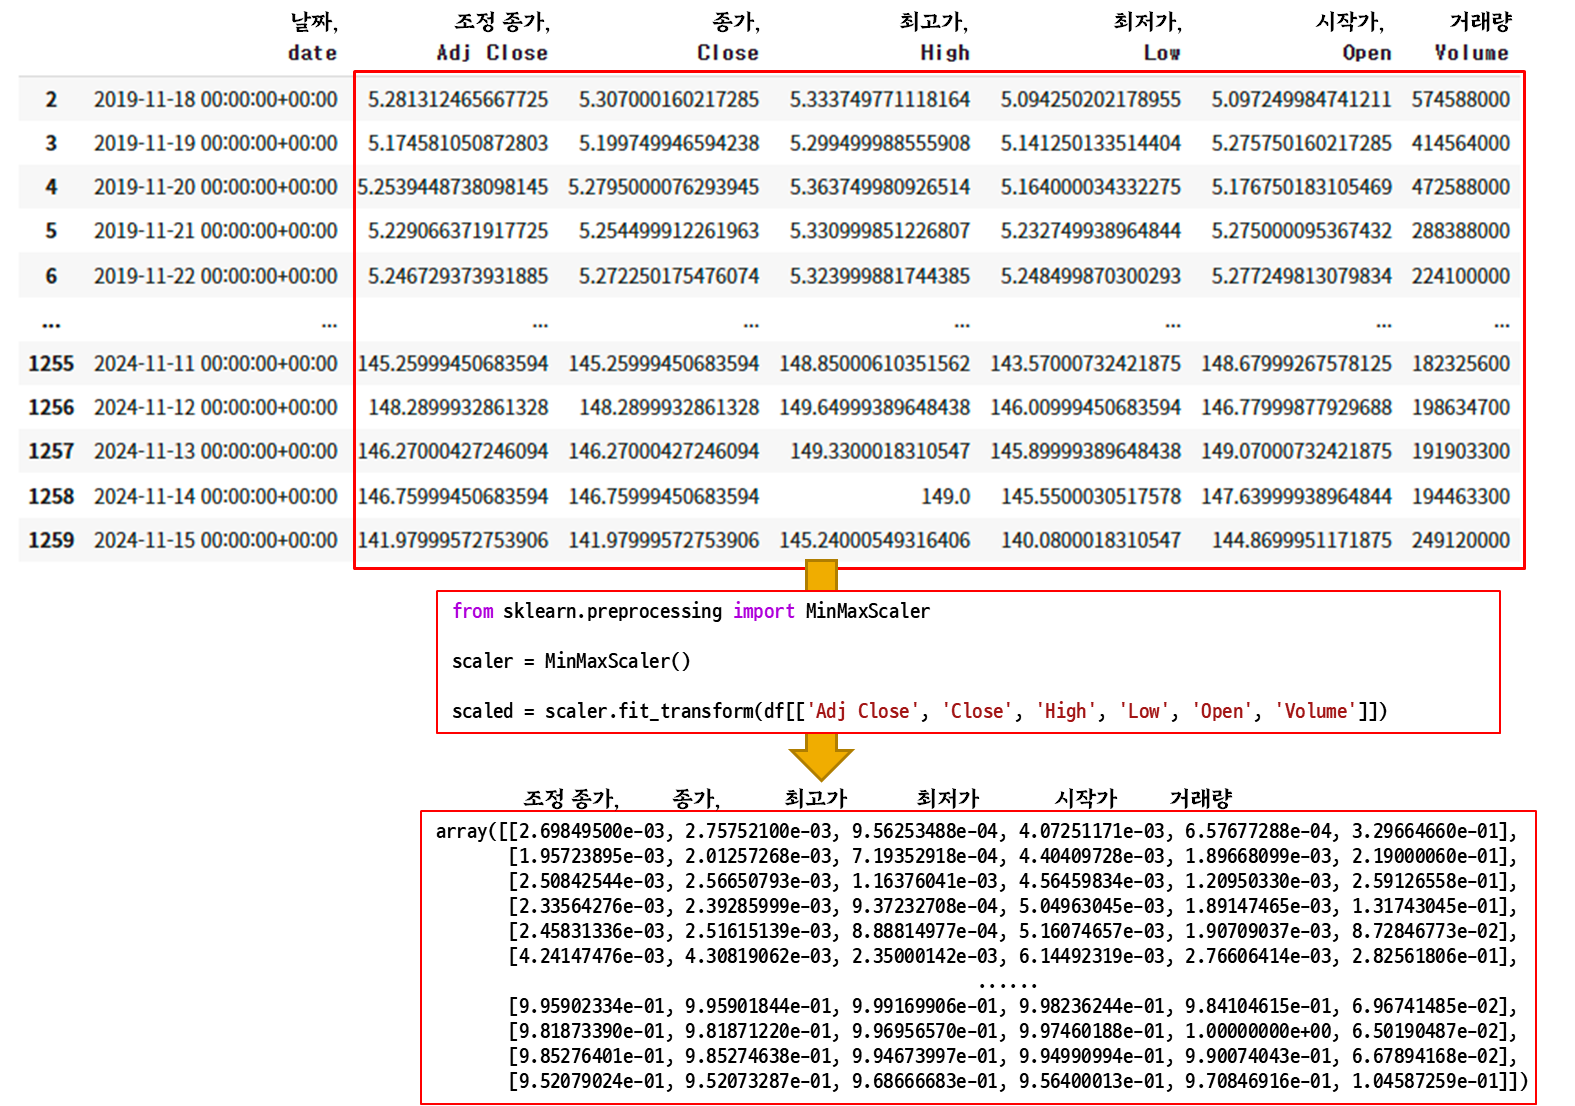

In [ ]:
# 정규화
import numpy as np
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

seq = scaler.fit_transform(df[['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']])  # 결과는 numpy 배열

# np.set_printoptions(threshold=np.inf)  # 줄바꾸지 않도록...
seq

## 4. 시계열 데이터 seq를 시계열 모델 개발을 위한 데이터셋으로 변환

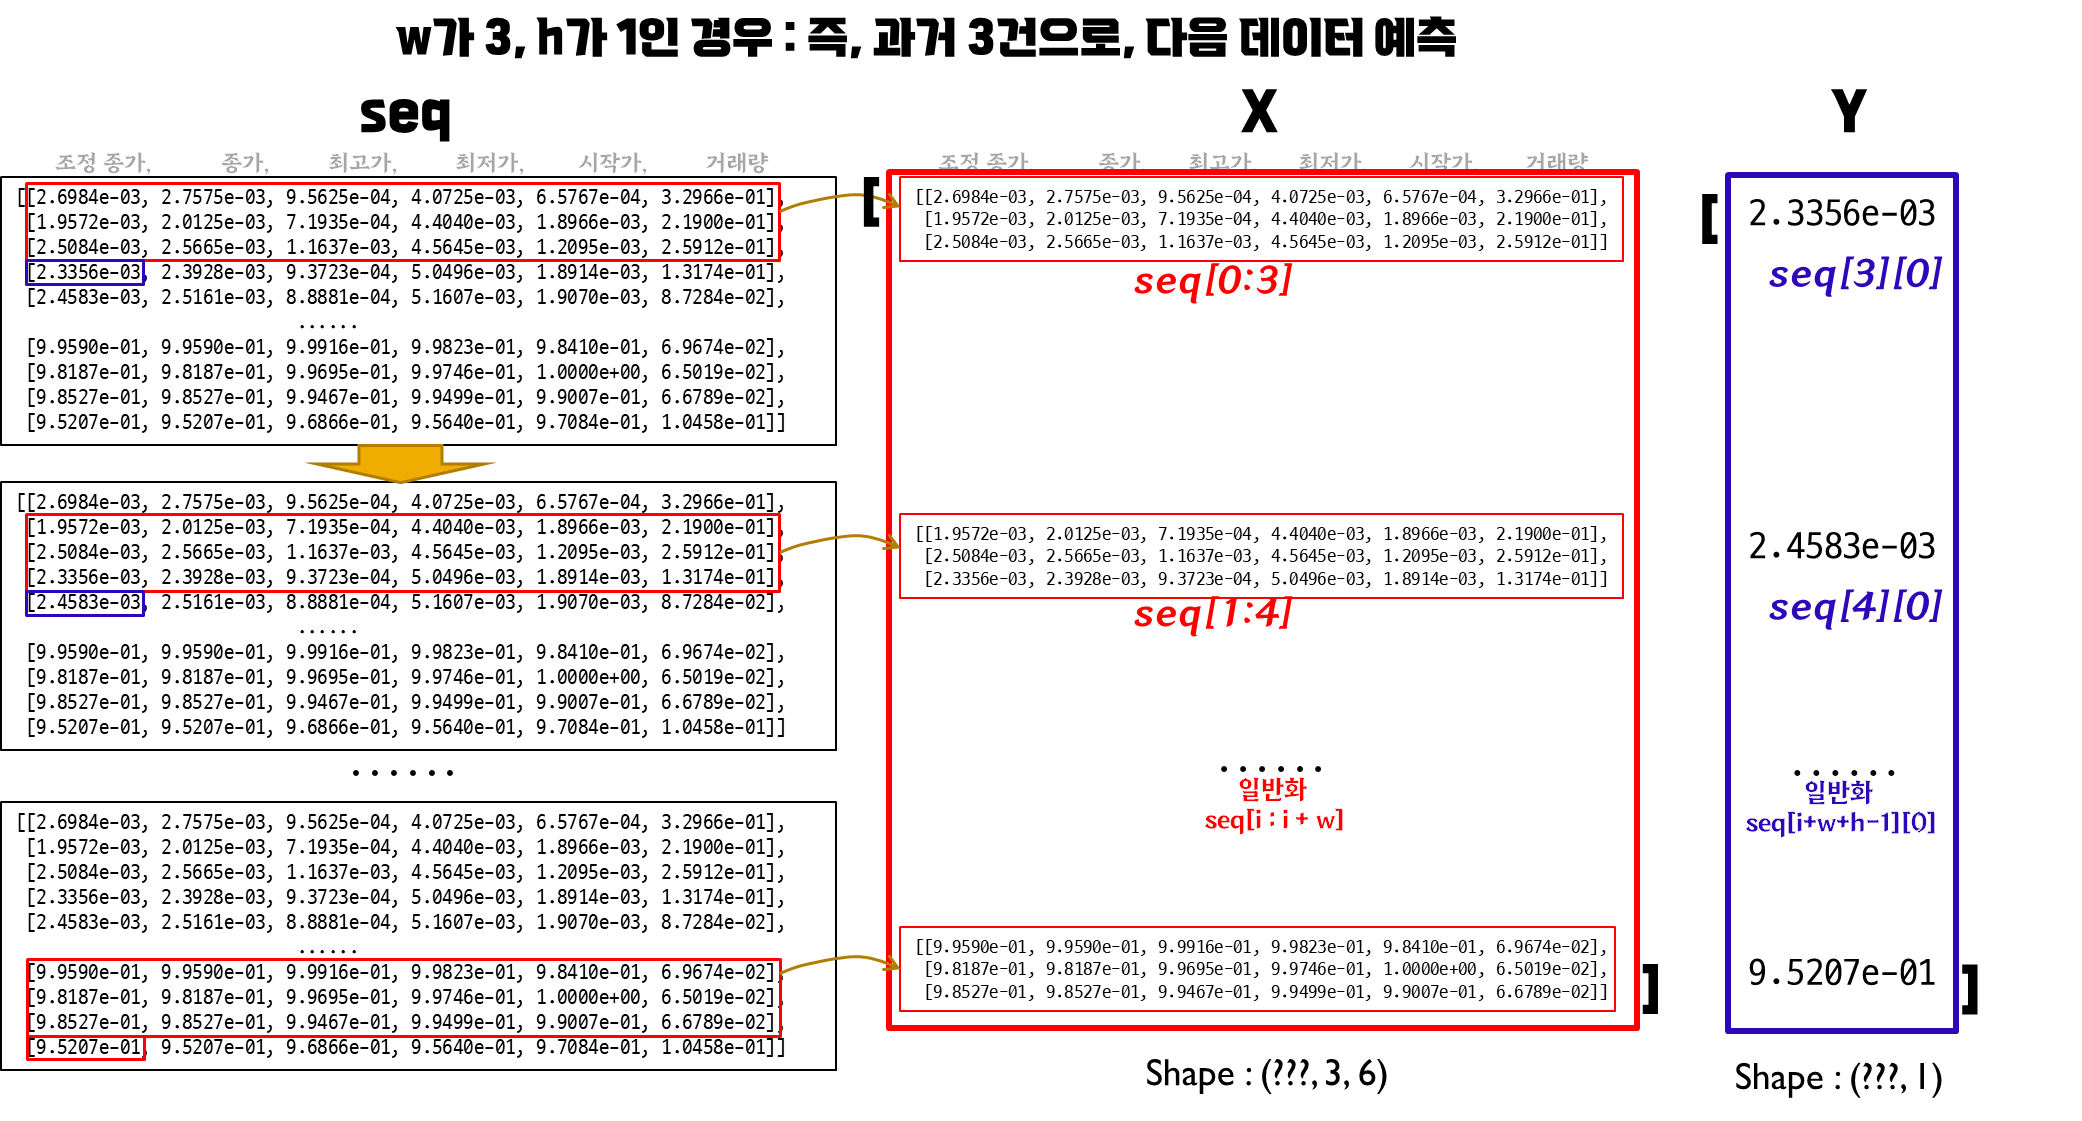

In [ ]:
w = 3      # window size
h = 1       # horizon factor


# RNN 학습을 위한 데이터 셋으로 변경
X, Y = [], []
for i in range(len(seq)-(w + h) + 1):
    x = seq[i : i + w]
    y = seq[i + w + h - 1][0]

    X.append(x)
    Y.append(y)

X = np.array(X) # 파이썬 리스트를 넘파이 배열로 변환
Y = np.array(Y)

In [ ]:
print(X.shape)
print(Y.shape)

In [ ]:
X[0]

In [ ]:
Y[0]

## 5. 데이터 분리하기(전체 데이터 ==> 훈련(80%) : 평가(20%))

In [ ]:
# train, test 분리

split = int(len(X)*0.8)

train_X = X[0:split]
train_Y = Y[0:split]

test_X = X[split:]
test_Y = Y[split:]

print(train_X.shape, train_Y.shape)
print(test_X.shape, test_Y.shape)

## 6. RNN 모델 생성 및 훈련 시키기

In [ ]:
# model 생성
import keras

model = keras.models.Sequential()

model.add(keras.layers.SimpleRNN(128, activation='tanh', input_shape=(3, 6)))

model.add(keras.layers.Dense(1))

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

model.compile(loss='mse', optimizer='adam', metrics=['mae'])

early_stop = EarlyStopping(monitor='val_loss', patience=10)

model.fit(train_X, train_Y, validation_data=(test_X, test_Y), epochs=100, callbacks=[early_stop])

In [ ]:
import matplotlib.pyplot as plt

pred = model.predict(test_X)

plt.figure(figsize=(12, 6))
plt.ylabel('adj close')
plt.xlabel('period')
plt.plot(test_Y, label='actual')
plt.plot(pred, label='prediction')
plt.grid()
plt.legend(loc='best')

plt.show()

## RNN 모델 개발 코드 전체(위 1 ~ 6 단계 코드 종합)

In [ ]:
# 야후 finance로부터 날짜별 주가 데이터 다운로드 하기
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import keras
from tensorflow.keras.callbacks import EarlyStopping


# 1. 데이터 준비하기
#   1.1. 야후 파이낸스로부터 주가 데이터 다운로드
down_data = yf.download("NVDA", start="2019-11-18", end="2024-11-19")  # 날짜 범위 설정
down_data.to_csv("nvidia.csv")

#   1.2. 다운로드한 데이터를 판다스 데이터프레임으로 읽어오기
df = pd.read_csv('/content/nvidia.csv')

# 2. 데이터 전처리 하기
#   2.1. 데이터 삭제하기([0, 1] 행 삭제, 0, 1행은 의미없는 데이터였음.)
df = df.drop([0, 1])

#   2.2. 데이터 타입 변경하기(문자 -> 숫자)
df['Adj Close'] = pd.to_numeric(df['Adj Close'], errors='coerce')
df['Close']     = pd.to_numeric(df['Close'], errors='coerce')
df['High']      = pd.to_numeric(df['High'], errors='coerce')
df['Low']       = pd.to_numeric(df['Low'], errors='coerce')
df['Open']      = pd.to_numeric(df['Open'], errors='coerce')
df['Volume']    = pd.to_numeric(df['Volume'], errors='coerce')

# 3. 데이터 정규화 하기
scaler = MinMaxScaler()

seq = scaler.fit_transform(df[['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']])  # 결과는 numpy 배열

# 4. RNN 학습을 위한 데이터 셋으로 변경
w = 3      # window size
h = 1       # horizon factor

X, Y = [], []
for i in range(len(seq)-(w + h) + 1):
    x = seq[i : i + w]
    y = seq[i + w + h - 1][0]

    X.append(x)
    Y.append(y)

X = np.array(X) # 파이썬 리스트를 넘파이 배열로 변환
Y = np.array(Y)


# 5. 훈련(train : 80%), 평가(test : 20%) 데이터로 분리
split = int(len(X)*0.8)

train_X = X[0:split]
train_Y = Y[0:split]

test_X = X[split:]
test_Y = Y[split:]


# 6. RNN 모델 생성
model = keras.models.Sequential()
model.add(keras.layers.SimpleRNN(128, activation='tanh', input_shape=(3, 6)))
model.add(keras.layers.Dense(1))

early_stop = EarlyStopping(monitor='val_loss', patience=10)  # 조기 종료 콜백

model.compile(loss='mse', optimizer='adam', metrics=['mae'])

# 7. 모델 학습 시기
model.fit(train_X, train_Y, validation_data=(test_X, test_Y), epochs=100, callbacks=[early_stop])

In [ ]:
import matplotlib.pyplot as plt

pred = model.predict(test_X)

plt.figure(figsize=(12, 6))
plt.ylabel('adj close')
plt.xlabel('period')
plt.plot(test_Y, label='actual')
plt.plot(pred, label='prediction')

plt.show()

## LSTM 모델로...

In [ ]:
# 야후 finance로부터 날짜별 주가 데이터 다운로드 하기
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import keras
from tensorflow.keras.callbacks import EarlyStopping


# 1. 데이터 준비하기
#   1.1. 야후 파이낸스로부터 주가 데이터 다운로드
down_data = yf.download("NVDA", start="2019-11-18", end="2024-11-19")  # 날짜 범위 설정
down_data.to_csv("nvidia.csv")

#   1.2. 다운로드한 데이터를 판다스 데이터프레임으로 읽어오기
df = pd.read_csv('/content/nvidia.csv')

# 2. 데이터 전처리 하기
#   2.1. 데이터 삭제하기([0, 1] 행 삭제, 0, 1행은 의미없는 데이터였음.)
df = df.drop([0, 1])

#   2.2. 데이터 타입 변경하기(문자 -> 숫자)
df['Adj Close'] = pd.to_numeric(df['Adj Close'], errors='coerce')
df['Close']     = pd.to_numeric(df['Close'], errors='coerce')
df['High']      = pd.to_numeric(df['High'], errors='coerce')
df['Low']       = pd.to_numeric(df['Low'], errors='coerce')
df['Open']      = pd.to_numeric(df['Open'], errors='coerce')
df['Volume']    = pd.to_numeric(df['Volume'], errors='coerce')

# 3. 데이터 정규화 하기
scaler = MinMaxScaler()

seq = scaler.fit_transform(df[['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']])  # 결과는 numpy 배열

# 4. RNN 학습을 위한 데이터 셋으로 변경
w = 3      # window size
h = 1       # horizon factor

X, Y = [], []
for i in range(len(seq)-(w + h) + 1):
    x = seq[i : i + w]
    y = seq[i + w + h - 1][0]

    X.append(x)
    Y.append(y)

X = np.array(X) # 파이썬 리스트를 넘파이 배열로 변환
Y = np.array(Y)


# 5. 훈련(train : 80%), 평가(test : 20%) 데이터로 분리
split = int(len(X)*0.8)

train_X = X[0:split]
train_Y = Y[0:split]

test_X = X[split:]
test_Y = Y[split:]


# 6. RNN 모델 생성
model = keras.models.Sequential()
model.add(keras.layers.LSTM(128, activation='tanh', input_shape=(3, 6)))
model.add(keras.layers.Dense(1))

early_stop = EarlyStopping(monitor='val_loss', patience=10)  # 조기 종료 콜백

model.compile(loss='mse', optimizer='adam', metrics=['mae'])

# 7. 모델 학습 시기
model.fit(train_X, train_Y, validation_data=(test_X, test_Y), epochs=100, callbacks=[early_stop])

In [ ]:
import matplotlib.pyplot as plt

pred = model.predict(test_X)

plt.figure(figsize=(12, 6))
plt.ylabel('adj close')
plt.xlabel('period')
plt.plot(test_Y, label='actual')
plt.plot(pred, label='prediction')

plt.show()

## LSTM을 적용하고 window_size를 50으로 설정해 보기.

In [ ]:
# 야후 finance로부터 날짜별 주가 데이터 다운로드 하기
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import keras
from tensorflow.keras.callbacks import EarlyStopping


# 1. 데이터 준비하기
#   1.1. 야후 파이낸스로부터 주가 데이터 다운로드
down_data = yf.download("NVDA", start="2019-11-18", end="2024-11-19")  # 날짜 범위 설정
down_data.to_csv("nvidia.csv")

#   1.2. 다운로드한 데이터를 판다스 데이터프레임으로 읽어오기
df = pd.read_csv('/content/nvidia.csv')

# 2. 데이터 전처리 하기
#   2.1. 데이터 삭제하기([0, 1] 행 삭제, 0, 1행은 의미없는 데이터였음.)
df = df.drop([0, 1])

#   2.2. 데이터 타입 변경하기(문자 -> 숫자)
df['Adj Close'] = pd.to_numeric(df['Adj Close'], errors='coerce')
df['Close']     = pd.to_numeric(df['Close'], errors='coerce')
df['High']      = pd.to_numeric(df['High'], errors='coerce')
df['Low']       = pd.to_numeric(df['Low'], errors='coerce')
df['Open']      = pd.to_numeric(df['Open'], errors='coerce')
df['Volume']    = pd.to_numeric(df['Volume'], errors='coerce')

# 3. 데이터 정규화 하기
scaler = MinMaxScaler()

seq = scaler.fit_transform(df[['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']])  # 결과는 numpy 배열

# 4. RNN 학습을 위한 데이터 셋으로 변경
w = 3      # window size
h = 1       # horizon factor

X, Y = [], []
for i in range(len(seq)-(w + h) + 1):
    x = seq[i : i + w]
    y = seq[i + w + h - 1][0]

    X.append(x)
    Y.append(y)

X = np.array(X) # 파이썬 리스트를 넘파이 배열로 변환
Y = np.array(Y)


# 5. 훈련(train : 80%), 평가(test : 20%) 데이터로 분리
split = int(len(X)*0.8)

train_X = X[0:split]
train_Y = Y[0:split]

test_X = X[split:]
test_Y = Y[split:]


# 6. RNN 모델 생성
model = keras.models.Sequential()
model.add(keras.layers.LSTM(128, activation='tanh', input_shape=(3, 6)))
model.add(keras.layers.Dense(1))

early_stop = EarlyStopping(monitor='val_loss', patience=10)  # 조기 종료 콜백

model.compile(loss='mse', optimizer='adam', metrics=['mae'])

# 7. 모델 학습 시기
model.fit(train_X, train_Y, validation_data=(test_X, test_Y), epochs=100, callbacks=[early_stop])

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


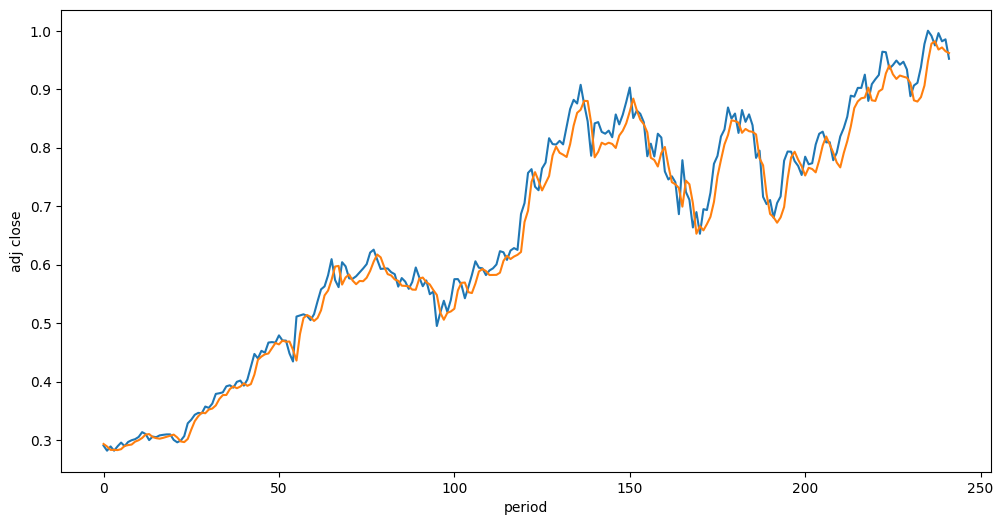

In [ ]:
import matplotlib.pyplot as plt

pred = model.predict(test_X)

plt.figure(figsize=(12, 6))
plt.ylabel('adj close')
plt.xlabel('period')
plt.plot(test_Y, label='actual')
plt.plot(pred, label='prediction')

plt.show()